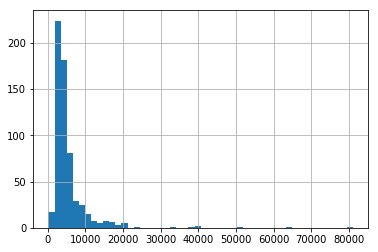

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Loan_Prediction.csv") #Reading the dataset in a dataframe using Pandas
df.tail()
df.describe()
df['ApplicantIncome'].hist(bins=50)

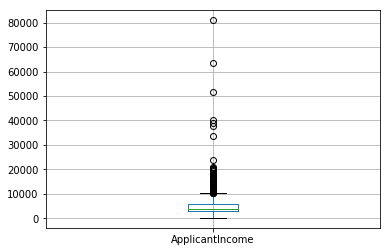

In [10]:
df.boxplot(column='ApplicantIncome')

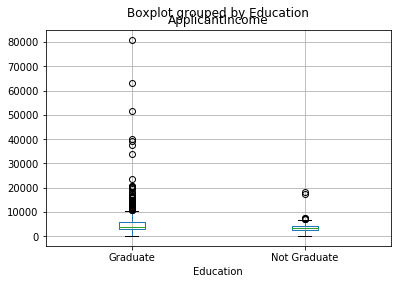

In [11]:
df.boxplot(column='ApplicantIncome', by='Education')

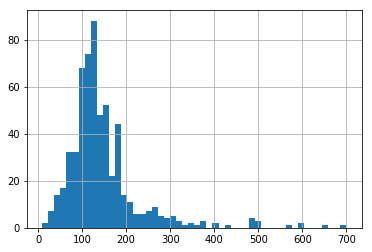

In [12]:
df['LoanAmount'].hist(bins=50)

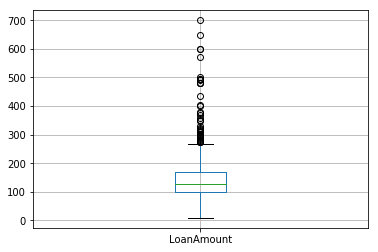

In [13]:
df.boxplot(column='LoanAmount')

In [25]:
temp1 = df['Credit_History'].value_counts(ascending=True)
print ('Frequency Table for Credit History')
print (temp1)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Pivot Table')
print(temp2)


Frequency Table for Credit History
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Pivot Table
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


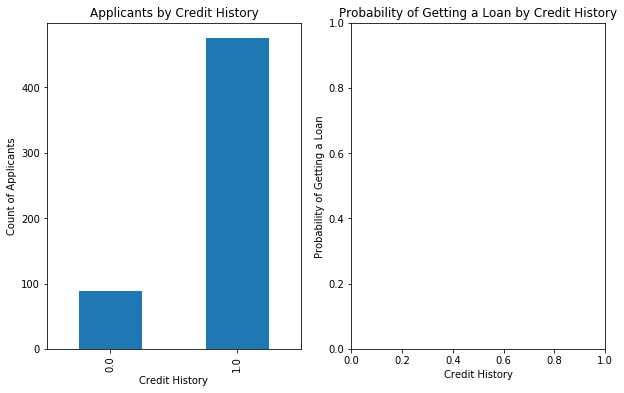

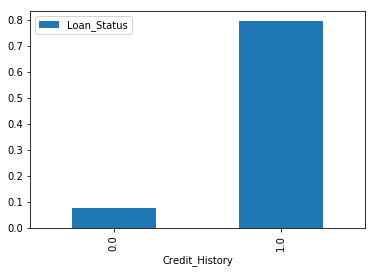

In [33]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit History')
temp1.plot(kind='bar')

ax2=fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Probability of Getting a Loan')
ax2.set_title('Probability of Getting a Loan by Credit History')

In [36]:
#Getting missing data.
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
#filling missing values in loan Amount
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

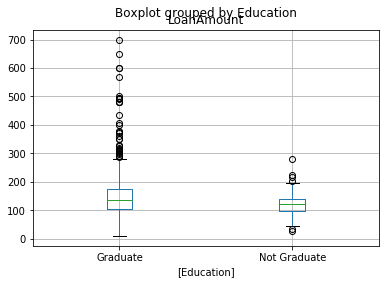

In [53]:
df.boxplot(column='LoanAmount', by=['Education'])

In [68]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [67]:
df['Self_Employed'].fillna('No', inplace=True)

In [107]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median) 
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                131.0         115.0
Yes               152.0         130.0


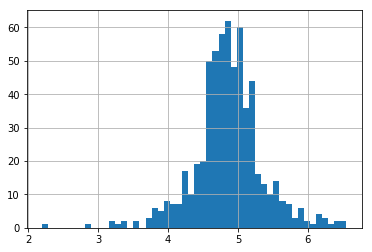

In [106]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=50)

In [120]:
#Data Handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("Loan_Prediction.csv", index_col='LoanAmount') #Reading the dataset in a dataframe using Panda

#Boolean Indexing.  this gives predetermined(by the user) subset of the data

data.loc[(data['Gender']=='Female')& (data['Education']=='Not Graduate')& (data['Loan_Status']=='Y'), 
         ["Gender", "Education", "Loan Status"]]
#Using the apply function

def num_missing(x):
    return sum(x.isnull())
print('Missing Values per Column')
print(data.apply(num_missing, axis=0))

print('\nMissing Values per Row')
print(data.apply(num_missing, axis=1))

#Determine pivot table
impute_grps = data.pivot_table(values=["ApplicantIncome"], index=["Gender","Married","Self_Employed"], 
                               aggfunc=np.mean)
#print (impute_grps)



Missing Values per Column
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing Values per Row
LoanAmount
NaN       0
 128.0    0
 66.0     0
 120.0    0
 141.0    0
 267.0    0
 95.0     0
 158.0    0
 168.0    0
 349.0    0
 70.0     0
 109.0    1
 200.0    0
 114.0    0
 17.0     0
 125.0    0
 100.0    1
 76.0     0
 133.0    0
 115.0    2
 104.0    0
 315.0    0
 116.0    0
 112.0    1
 151.0    2
 191.0    0
 122.0    0
 110.0    0
 35.0     0
 120.0    1
         ..
 146.0    0
 172.0    0
 104.0    0
 70.0     0
 94.0     1
 106.0    0
 56.0     0
 205.0    0
 292.0    1
 142.0    0
 260.0    0
 110.0    0
 187.0    0
 88.0     1
 180.0    0
 192.0    0
 350.0    2
 155.0    1
 128.0    0
 172.0    0
 496.0    0
NaN       0
 1